# Free vibrations

In order to determine the dynamic properties of a simply supported bridge with a mass of $10^6Kg$, the midpoint is displaced $5mm$ by a jack and then suddenly released. At the end of 20 complete cycles, the time is $3s$ and the peak displacement measured is $1mm$. Determine the natural period and damping ratio of the bridge.

In [1]:
# useful imports
import numpy as np
import matplotlib.pyplot as plt

# problem data
cycles = 20
time = 3
u_0 = 5
u_end = 1
m = 1e6

Assuming a small damping, $\sqrt{1-\xi^2}\rightarrow 1$, then, the damping ratio $\xi$ is directly related to the decay coefficient $\zeta$ as
$$
\zeta = 2 \pi \xi
$$
and $\zeta$ determined by the ratio among two oscillations
$$
\frac{u_n}{u_{n+1}} = e^\zeta \quad \rightarrow \quad \frac{u_0}{u_n} = e^{n\zeta}
$$


In [2]:
dzeta = np.log(u_0/u_end) / cycles   # decay coefficient
xi = dzeta / 2 / np.pi               # damping ratio
print('The damping ratio is {:.4f} or {:.2%}'.format(xi, xi))

The damping ratio is 0.0128 or 1.28%


## Frquency and damped frequency

However, the damping ratio modifies the oscillation frequency according to
$$
\bar{\omega} = \omega\sqrt{1-\xi^2}
$$

Using that expression, the damping ratio may be determined taking account of that effect
$$
\frac{u_0}{u_n} = e^\frac{2\pi n\xi}{\sqrt{1-\xi^2}}
$$

In [3]:
aux = np.log(u_0/u_end) / 2 / np.pi / cycles
xi = aux / np.sqrt(1 + aux**2)
print('The damping ratio is {:.4f} or {:.2%}'.format(xi, xi))

The damping ratio is 0.0128 or 1.28%


And the frequencies are identified from the number of cycles
$$
\bar{\omega}t = 2\pi n
$$

In [4]:
omega_d = 2 * np.pi * cycles / time
omega = omega_d / np.sqrt(1-xi**2)
print('The damped frequency is : {:.1f}'.format(omega_d))
print('The frequency is        : {:.1f}'.format(omega))

The damped frequency is : 41.9
The frequency is        : 41.9


In [5]:
T = 2 * np.pi / omega
print('The natural period is {:.2f} sec'.format(T))

The natural period is 0.15 sec


Finally, the equation of motion is determined by
$$
u(t) = C e^{-\xi\omega t} \sin(\bar\omega t + \phi)
$$
where
$$
C = \sqrt{u_0^2 + \left(\frac{\dot{u}_0 + \xi \omega u_0}{\bar\omega}\right)^2}
\quad \text{and} \quad
\tan\phi = \frac{\bar\omega u_0}{\dot{u}_0 + \xi \omega u_0}
$$

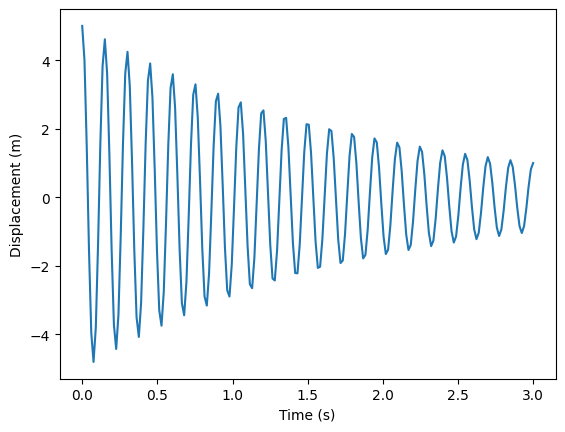

In [6]:
# Definition of the equation of motion
omega_d = omega * np.sqrt(1 - xi**2)  # damped frequency
aux = xi * u_0 * omega / omega_d
C = np.sqrt(u_0**2 + aux**2)          # amplitude
phi = np.arctan(omega_d/aux)          # phase

# Evaluation of the equation at several points
times = np.linspace(0, time, num=200)
displacements = C * np.exp(-xi*omega*times) * np.sin(omega_d*times + phi)

# Plot the results
plt.plot(times, displacements)
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.show()

For a more comprehensive explanation, the above results can be compared against the undamped solution
$$
u(t) = C \sin(\omega t + \phi)
$$

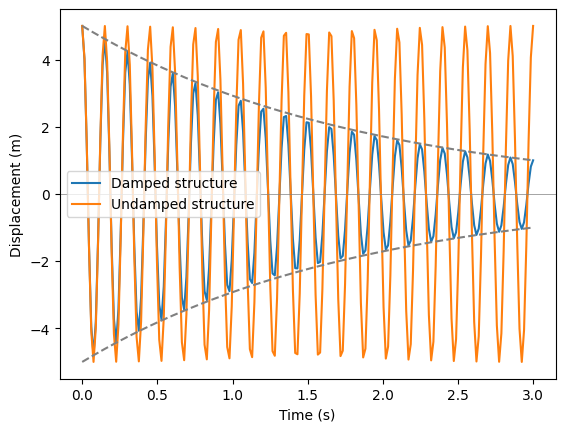

In [7]:
undamp_displacements = C * np.sin(omega*times + phi)
max_damp = C * np.exp(-xi*omega*times)
min_damp = -C * np.exp(-xi*omega*times)

# Plot the results
plt.plot(times, displacements, label='Damped structure')
plt.plot(times, undamp_displacements, label='Undamped structure')
plt.plot(times, max_damp, color='gray', linestyle='--')
plt.plot(times, min_damp, color='gray', linestyle='--')
plt.axhline(0, color='gray', linewidth=.5)
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.show()

Repat the problem with a higher damping, e.g., using 2 cycles